# IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


# LOADING DATA

In [3]:
df=pd.read_csv(r'C:\Users\Lenovo\Desktop\Project Datasets\Stroke Dataset.csv')

In [4]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


# EDA & PRE-PROCESSING

In [5]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
df.shape

(5110, 12)

There are 5110 rows and 12 columns in the given dataset

In [7]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [8]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [9]:
df.value_counts()

id     gender  age   hypertension  heart_disease  ever_married  work_type      Residence_type  avg_glucose_level  bmi   smoking_status   stroke
77     Female  13.0  0             0              No            children       Rural           85.81              18.6  Unknown          0         1
49605  Male    63.0  0             0              Yes           Private        Urban           74.39              31.0  formerly smoked  0         1
49661  Male    53.0  0             0              Yes           Govt_job       Urban           85.17              29.2  never smoked     0         1
49646  Male    72.0  0             1              Yes           Self-employed  Rural           113.63             26.5  Unknown          0         1
49645  Male    58.0  0             0              No            Private        Rural           76.22              22.2  formerly smoked  0         1
                                                                                                               

In [10]:
df.duplicated().value_counts()

False    5110
dtype: int64

There are no duplicates in the data set

In [11]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


The average age in the dataset as observed is 43 years old. 

The average glucose level among patients is 106.147677.

The average BMI of among patients is 28.893237.

In [12]:
df.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [13]:
df['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [14]:
df['age'].unique()

array([6.70e+01, 6.10e+01, 8.00e+01, 4.90e+01, 7.90e+01, 8.10e+01,
       7.40e+01, 6.90e+01, 5.90e+01, 7.80e+01, 5.40e+01, 5.00e+01,
       6.40e+01, 7.50e+01, 6.00e+01, 5.70e+01, 7.10e+01, 5.20e+01,
       8.20e+01, 6.50e+01, 5.80e+01, 4.20e+01, 4.80e+01, 7.20e+01,
       6.30e+01, 7.60e+01, 3.90e+01, 7.70e+01, 7.30e+01, 5.60e+01,
       4.50e+01, 7.00e+01, 6.60e+01, 5.10e+01, 4.30e+01, 6.80e+01,
       4.70e+01, 5.30e+01, 3.80e+01, 5.50e+01, 1.32e+00, 4.60e+01,
       3.20e+01, 1.40e+01, 3.00e+00, 8.00e+00, 3.70e+01, 4.00e+01,
       3.50e+01, 2.00e+01, 4.40e+01, 2.50e+01, 2.70e+01, 2.30e+01,
       1.70e+01, 1.30e+01, 4.00e+00, 1.60e+01, 2.20e+01, 3.00e+01,
       2.90e+01, 1.10e+01, 2.10e+01, 1.80e+01, 3.30e+01, 2.40e+01,
       3.40e+01, 3.60e+01, 6.40e-01, 4.10e+01, 8.80e-01, 5.00e+00,
       2.60e+01, 3.10e+01, 7.00e+00, 1.20e+01, 6.20e+01, 2.00e+00,
       9.00e+00, 1.50e+01, 2.80e+01, 1.00e+01, 1.80e+00, 3.20e-01,
       1.08e+00, 1.90e+01, 6.00e+00, 1.16e+00, 1.00e+00, 1.40e

In [15]:
df['hypertension'].unique()

array([0, 1], dtype=int64)

In [16]:
df['heart_disease'].unique()

array([1, 0], dtype=int64)

In [17]:
df['ever_married'].unique()

array(['Yes', 'No'], dtype=object)

In [18]:
df['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [19]:
df['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [20]:
df['avg_glucose_level'].unique()

array([228.69, 202.21, 105.92, ...,  82.99, 166.29,  85.28])

In [21]:
df['bmi'].unique()

array([36.6,  nan, 32.5, 34.4, 24. , 29. , 27.4, 22.8, 24.2, 29.7, 36.8,
       27.3, 28.2, 30.9, 37.5, 25.8, 37.8, 22.4, 48.9, 26.6, 27.2, 23.5,
       28.3, 44.2, 25.4, 22.2, 30.5, 26.5, 33.7, 23.1, 32. , 29.9, 23.9,
       28.5, 26.4, 20.2, 33.6, 38.6, 39.2, 27.7, 31.4, 36.5, 33.2, 32.8,
       40.4, 25.3, 30.2, 47.5, 20.3, 30. , 28.9, 28.1, 31.1, 21.7, 27. ,
       24.1, 45.9, 44.1, 22.9, 29.1, 32.3, 41.1, 25.6, 29.8, 26.3, 26.2,
       29.4, 24.4, 28. , 28.8, 34.6, 19.4, 30.3, 41.5, 22.6, 56.6, 27.1,
       31.3, 31. , 31.7, 35.8, 28.4, 20.1, 26.7, 38.7, 34.9, 25. , 23.8,
       21.8, 27.5, 24.6, 32.9, 26.1, 31.9, 34.1, 36.9, 37.3, 45.7, 34.2,
       23.6, 22.3, 37.1, 45. , 25.5, 30.8, 37.4, 34.5, 27.9, 29.5, 46. ,
       42.5, 35.5, 26.9, 45.5, 31.5, 33. , 23.4, 30.7, 20.5, 21.5, 40. ,
       28.6, 42.2, 29.6, 35.4, 16.9, 26.8, 39.3, 32.6, 35.9, 21.2, 42.4,
       40.5, 36.7, 29.3, 19.6, 18. , 17.6, 19.1, 50.1, 17.7, 54.6, 35. ,
       22. , 39.4, 19.7, 22.5, 25.2, 41.8, 60.9, 23

In [22]:
df['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [23]:
df['stroke'].unique()

array([1, 0], dtype=int64)

From the above unique values we observed:-
1. There are 3 genders (Male, Female, Other).
2. Hypertension has 0 and 1 as values indicating if the person is having it or no (0 if 'NO', 1 if 'YES').
3. Heart disease has 0 and 1 as values indicating if the person is having it or no (0 if 'NO', 1 if 'YES').
4. Smoking status are of 4 types:- formerly smoked, never smoked, smokes, Unknown.

In [24]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

There are 201 null values present in bmi column.

In [25]:
#Filling the null values in bmi column using mean.
df['bmi'].fillna(df['bmi'].mean(),inplace=True)

In [26]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [27]:
#checking shape.
df.shape

(5110, 12)

# COUNT PLOT

In [28]:
df.value_counts('stroke')

stroke
0    4861
1     249
dtype: int64

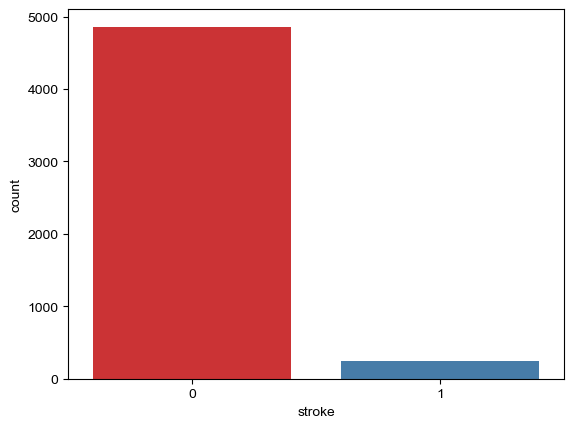

In [29]:
sns.countplot(x='stroke',data=df,palette='Set1')
sns.set_theme(style="darkgrid")
plt.show()

The above countplot we see few people had stroke and maximum number of people didn't had stroke.

From this we can say the data is imbalance.

# DISTRIBUTION PLOT

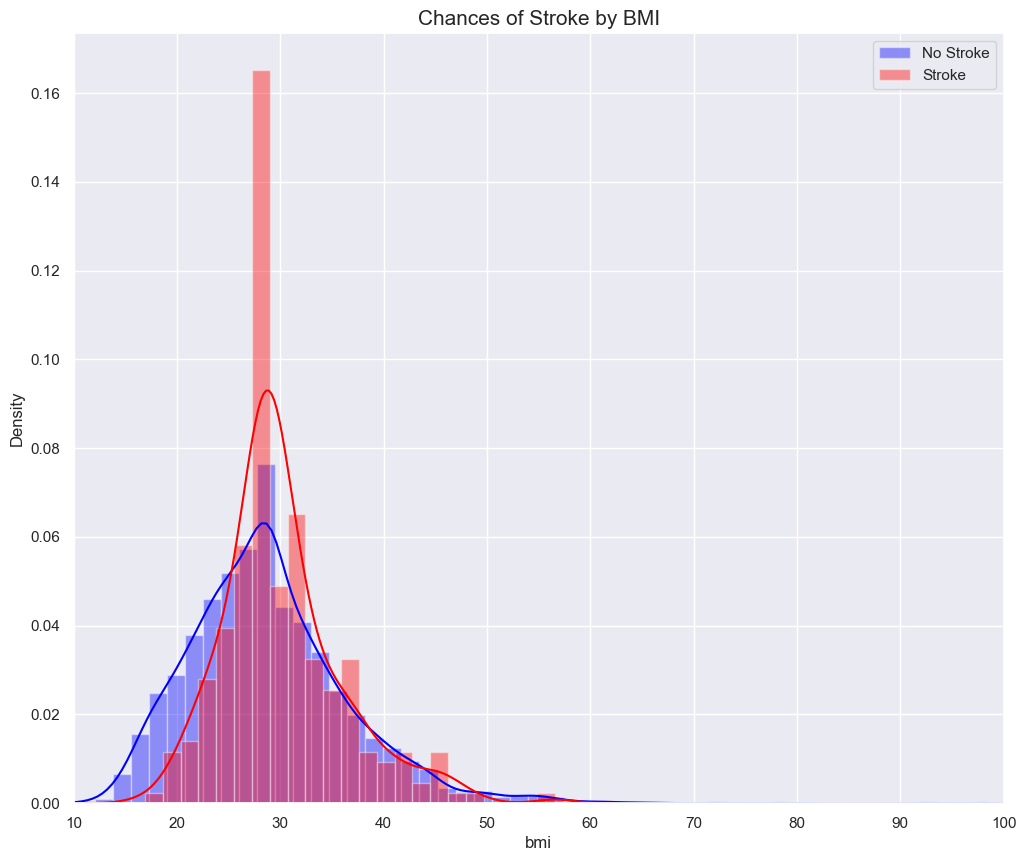

In [30]:
plt.figure(figsize=(12,10))


sns.distplot(df[df['stroke'] == 0]["bmi"], color='blue', label='No Stroke')
sns.distplot(df[df['stroke'] == 1]["bmi"], color='red', label='Stroke')

plt.title('Chances of Stroke by BMI', fontsize=15)
plt.xlim([10,100])
plt.legend()
plt.show()

The plot shows bell shaped curve, therefore the given dataset is in normal distribution.

People who are having BMI between 25 to 30 known as over weight people suffered stroke more.

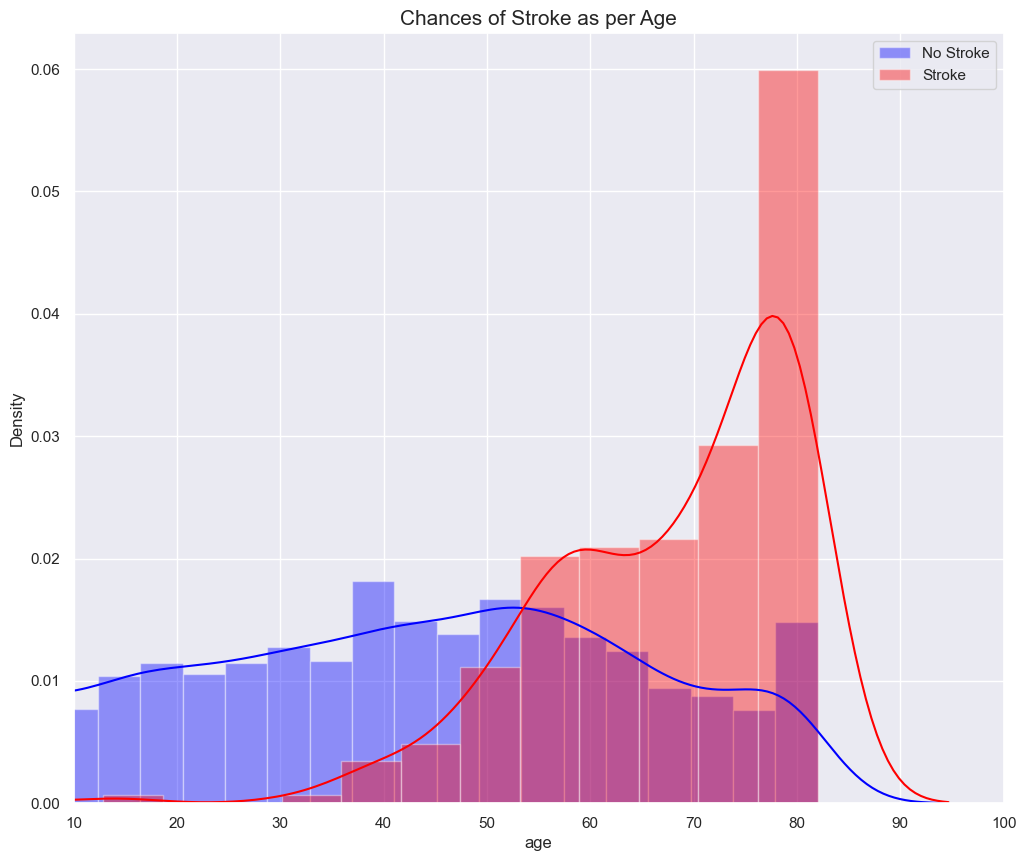

In [31]:
plt.figure(figsize=(12,10))


sns.distplot(df[df['stroke'] == 0]["age"], color='blue', label='No Stroke')
sns.distplot(df[df['stroke'] == 1]["age"], color='red', label='Stroke')

plt.title('Chances of Stroke as per Age', fontsize=15)
plt.xlim([10,100])
plt.legend()
plt.show()

People above the age of 50 suffered stroke more.

# HEAT MAP

                         id       age  hypertension  heart_disease  \
id                 1.000000  0.003538      0.003550      -0.001296   
age                0.003538  1.000000      0.276398       0.263796   
hypertension       0.003550  0.276398      1.000000       0.108306   
heart_disease     -0.001296  0.263796      0.108306       1.000000   
avg_glucose_level  0.001092  0.238171      0.174474       0.161857   
bmi                0.002999  0.325942      0.160189       0.038899   
stroke             0.006388  0.245257      0.127904       0.134914   

                   avg_glucose_level       bmi    stroke  
id                          0.001092  0.002999  0.006388  
age                         0.238171  0.325942  0.245257  
hypertension                0.174474  0.160189  0.127904  
heart_disease               0.161857  0.038899  0.134914  
avg_glucose_level           1.000000  0.168751  0.131945  
bmi                         0.168751  1.000000  0.038947  
stroke                    

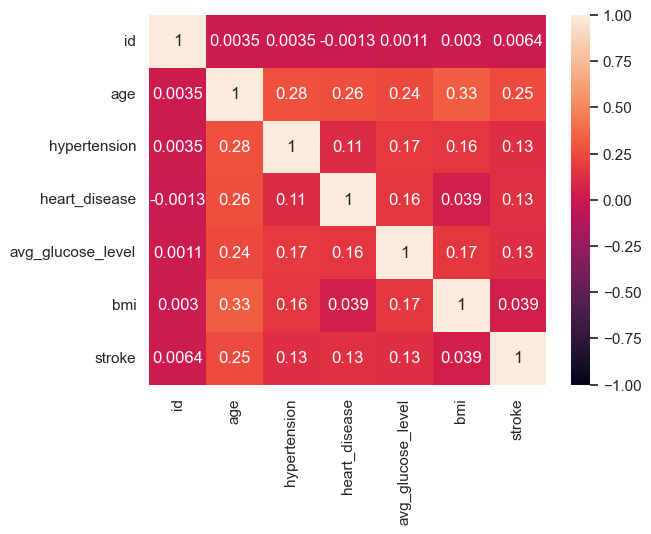

In [32]:
x= df
corr_df=x.corr(method='pearson')
print(corr_df)
 
sns.heatmap(corr_df,vmax=1.0,vmin=-1.0,annot=True) #
plt.show()

In [33]:
#Transforming Categorical data into Numerical data.

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

df['gender']=le.fit_transform(df['gender'])
df['ever_married']=le.fit_transform(df['ever_married'])
df['work_type']=le.fit_transform(df['work_type'])
df['Residence_type']=le.fit_transform(df['Residence_type'])
df['smoking_status']=le.fit_transform(df['smoking_status'])

In [34]:
df.head()
#columns like gender, ever_married, work_type, residence_type and smoking_status are changed into numerical data.

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


In [35]:
#Dropping columns that ain't necessary.
df.drop(['id','ever_married','work_type','Residence_type'],axis=1,inplace=True)

In [36]:
df.head()

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,228.69,36.600000,1,1
1,0,61.0,0,0,202.21,28.893237,2,1
2,1,80.0,0,1,105.92,32.500000,2,1
3,0,49.0,0,0,171.23,34.400000,3,1
4,0,79.0,1,0,174.12,24.000000,2,1


In [37]:
df.shape

(5110, 8)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int32  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   avg_glucose_level  5110 non-null   float64
 5   bmi                5110 non-null   float64
 6   smoking_status     5110 non-null   int32  
 7   stroke             5110 non-null   int64  
dtypes: float64(3), int32(2), int64(3)
memory usage: 279.6 KB


# TRAIN & TEST SPLIT

In [39]:
# Creating x and y variables.
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

# x=df.iloc[:,0:-1] is used to get the coloumns and rows using indexing.

In [40]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler.fit(x)
x=scaler.transform(x)
print(x)

[[ 1.18807255e+00  1.05143428e+00 -3.28601864e-01 ...  2.70637544e+00
   1.00123401e+00 -3.51780710e-01]
 [-8.40343999e-01  7.86070073e-01 -3.28601864e-01 ...  2.12155854e+00
   4.61555355e-16  5.81552327e-01]
 [ 1.18807255e+00  1.62639008e+00 -3.28601864e-01 ... -5.02830130e-03
   4.68577254e-01  5.81552327e-01]
 ...
 [-8.40343999e-01 -3.63841511e-01 -3.28601864e-01 ... -5.11442636e-01
   2.21736316e-01  5.81552327e-01]
 [ 1.18807255e+00  3.43796387e-01 -3.28601864e-01 ...  1.32825706e+00
  -4.27845098e-01 -3.51780710e-01]
 [-8.40343999e-01  3.42048064e-02 -3.28601864e-01 ... -4.60867458e-01
  -3.49895329e-01 -1.28511375e+00]]


In [41]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.3, random_state=10)

In [42]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

#As per industrial standard, test_size is 20% for less than 1000 observsations and 30% for greater than 1000 observations.

(3577, 7)
(3577,)
(1533, 7)
(1533,)


# BALANCING THE DATA USING SMOTE

In [43]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [44]:
x_train_smote, y_train_smote = smote.fit_resample(x_train.astype('float'),y_train)

In [45]:
from collections import Counter
print("Before SMOTE :" , Counter(y_train))
print("After SMOTE :" , Counter(y_train_smote))

Before SMOTE : Counter({0: 3408, 1: 169})
After SMOTE : Counter({0: 3408, 1: 3408})


# MODELLING

# LOGISTIC REGRESSION

In [46]:
from sklearn.linear_model import LogisticRegression
#create a model
Log=LogisticRegression()
#fitting training data into the model
Log.fit(x_train_smote,y_train_smote)
y_pred1=Log.predict(x_test)


In [47]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
 
cfm=confusion_matrix(y_test,y_pred1)
print(cfm)
 
print('classification report: ',)
print(classification_report(y_test,y_pred1))
 
acc=accuracy_score(y_test,y_pred1)
print('accuracy of the model: ',acc)

[[1090  363]
 [  19   61]]
classification report: 
              precision    recall  f1-score   support

           0       0.98      0.75      0.85      1453
           1       0.14      0.76      0.24        80

    accuracy                           0.75      1533
   macro avg       0.56      0.76      0.55      1533
weighted avg       0.94      0.75      0.82      1533

accuracy of the model:  0.7508153946510111


# DECISION TREE

In [48]:
from sklearn.tree import DecisionTreeClassifier

DT=DecisionTreeClassifier(random_state=10)

#fit the model on data and predict the values

DT.fit(x_train_smote,y_train_smote)

y_pred2=DT.predict(x_test)

#print(y_pred1)
#print(list(zip(y_test,y_pred1)))

In [49]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(y_test,y_pred2)
print(cfm)

print('classification report: ',)
print(classification_report(y_test,y_pred2))

acc=accuracy_score(y_test,y_pred2)
print('accuracy of the model: ',acc)

[[1325  128]
 [  65   15]]
classification report: 
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      1453
           1       0.10      0.19      0.13        80

    accuracy                           0.87      1533
   macro avg       0.53      0.55      0.53      1533
weighted avg       0.91      0.87      0.89      1533

accuracy of the model:  0.8741030658838878


# RANDOM FOREST

In [50]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=100, random_state=10)

##fit the model in the data and predict the values

rf.fit(x_train_smote,y_train_smote)

y_pred3=rf.predict(x_test)

In [51]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
 
cfm=confusion_matrix(y_test,y_pred3)
print(cfm)
 
print('classification report: ',)
print(classification_report(y_test,y_pred3))
 
acc=accuracy_score(y_test,y_pred3)
print('accuracy of the model: ',acc)

[[1357   96]
 [  64   16]]
classification report: 
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1453
           1       0.14      0.20      0.17        80

    accuracy                           0.90      1533
   macro avg       0.55      0.57      0.56      1533
weighted avg       0.91      0.90      0.90      1533

accuracy of the model:  0.8956294846705806


# XGBOOST

In [52]:
from xgboost import XGBClassifier

In [53]:
xgb = XGBClassifier()
xgb.fit(x_train_smote,y_train_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [54]:
y_pred4=xgb.predict(x_test)

In [55]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
 
cfm=confusion_matrix(y_test,y_pred4)
print(cfm)
 
print('classification report: ',)
print(classification_report(y_test,y_pred4))
 
acc=accuracy_score(y_test,y_pred4)
print('accuracy of the model: ',acc)

[[1354   99]
 [  63   17]]
classification report: 
              precision    recall  f1-score   support

           0       0.96      0.93      0.94      1453
           1       0.15      0.21      0.17        80

    accuracy                           0.89      1533
   macro avg       0.55      0.57      0.56      1533
weighted avg       0.91      0.89      0.90      1533

accuracy of the model:  0.8943248532289628


# SUMMARY & CONCLUSION

The given dataset is of Brain Stroke Prediction.

We have loaded the libraries and data and performed EDA in which:-
1.There are 5110 rows and 12 columns.

2.There are 201 null values present in the bmi column which are replaced using mean.

3.There are no duplicates.

4.Plotted the plots required and it is observed that the dataset is imbalanced.

5.Transforming categorical data into numerical data.

6.Dropping columns like id, ever_married, work_type, Residence_type as those columns are not required.

7.Creating x and y variables.

8.Performing standardization and train test split.

9.Balancing the data using SMOTE (Synthetic Minority Oversampling Technique).

All the models gives great accuracy, but XGBoost algorithm gives the best accuracy of 89%.